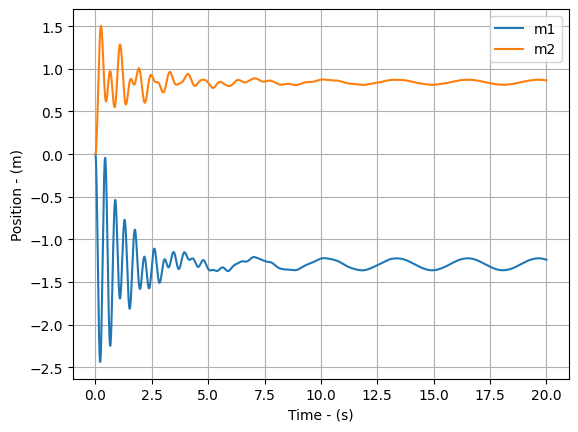

In [44]:
import numpy as np
import matplotlib.pyplot as plt


def oscilator(y, t):
    """    
    Defines the ODE and its parameters.
    
    Parameters:
    - y: Array containing xi and vi values
    - t: float with the interaction instant
    
    Returns:
    - An array with evaluated dxidt dvidt

    NOTE:
    - TODO: rewrite the function so all coefficients
    could be given by an input array and define dxidt
    and dvidt for any number of particles.
    """
    
    x1, x2, v1, v2 = y
    
    m1 = 0.1  # mass of the first particle
    m2 = 0.2  # mass of the second particle
    k1 = 10  # elasticity coefficient 1
    k2 = 8  # elasticity coefficient 2
    k3 = 12  # elasticity coefficient 3
    b1 = 0.2  # damping coefficient 1
    b2 = 0.1  # damping coefficient 2
    A = 1.0 # force amplitude
    w = 2.0  # oscillating constant omega
    L1 = 0.5  # equilibrium length 1
    L2 = 1.0  # equilibrium length 2
    L3 = 0.6  # equilibrium length 3
        
    dx1dt = v1
    dx2dt = v2
    dv1dt = (-1/m1)*(k1*(x1-L1)-k2*(x2-x1-L2)+b1*v1-A * np.sin(w*t))
    dv2dt = (-1/m2)*(k2*(x2-x1-L2)+k3*(x2-L3)+b2*v2)

    return np.array([dx1dt, dx2dt, dv1dt, dv2dt]) 


def rk4(A, y0, t0, t1, h):
    """
    Solve a system of linear differential equations using the RK4 method.

    Parameters:
    - A: A function that calculates the derivative of the system.
         It takes the current state vector y and time t as inputs and returns the derivative dy/dt.
         The derivative should be returned as a 1D numpy array.
    - y0: The initial state vector at t0.
          It should be given as a 1D numpy array.
    - t0: The initial time.
    - t1: The final time.
    - h: The step size.

    Returns:
    - t: A 1D numpy array containing the time values from t0 to t1 with step h.
    - y: A 2D numpy array containing the state vectors corresponding to each time point.
         Each row represents a state vector at a specific time.
         
    Complexity:
        - Considering N = num_steps = (t1 - t0) / h + 1
        we can say that the complexity of this algorithm
        is of the order O(N) since the RK4 method mainly 
        depends on the number of steps performed in each 
        iteration, calculating k1, k2, k3, and k4.
    """
    
    num_step = int((t1+t0)/h)+1
    t = np.linspace(t0, t1, num_step)
    y = np.zeros((num_step, len(y0)))
    y[0] = y0
    
    
    for i in range(num_step - 1):
        k1 = h * oscilator(y[i] , t[i])
        k2 = h * oscilator(y[i] + 0.5 * k1 , t[i] + 0.5 * h)
        k3 = h * oscilator(y[i] + 0.5 * k2 , t[i] + 0.5 * h)
        k4 = h * oscilator(y[i] + k3 , t[i] + h)
        
        y[i+1] = y[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)
        
    return t, y


# initial conditions
y0 = np.array([1.5, 0.0, 0.0, 0.0])  # [x1, x2, v1, v2]
t0 = 0.0
t1 = 20.0
h = 0.001
# numerical solution using the RK4 method.
t, y = rk4(oscilator, y0, t0, t1, h)

# Print solutions
#for i in range(len(t)):
#    print(f"t: {t[i]}, x1: {y[i][0]}, x2: {y[i][1]}, v1: {y[i][2]}, v2: {y[i][3]}")


# plot section
plt.plot(t, y[:, 0] - y[0, 0], label='m1')  # Subtrai a posição de equilíbrio da partícula 1
plt.plot(t, y[:, 1] - y[0, 1], label='m2')  # Subtrai a posição de equilíbrio da partícula 2
plt.xlabel('Time - (s)')
plt.ylabel('Position - (m)')
plt.legend()
plt.grid(True)
plt.show()


# Salva a figura em um diretório específico
#plt.savefig('C:\\Users\\paulo\\Desktop\\códigos\\IC-FAPESP-2022-2023\\melhores códigos\\images\\clássicos\\RK4_0001.png', dpi=300)

#plt.show()